In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Dataset303.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


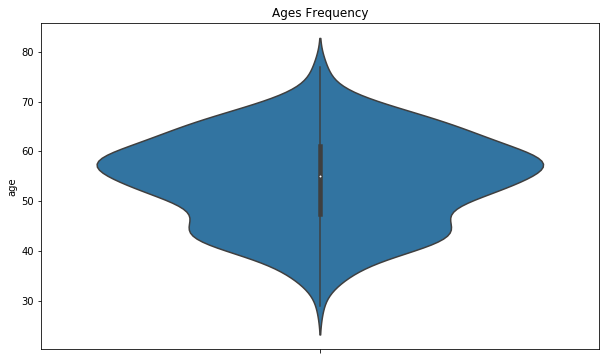

In [3]:
#df.drop(["CustomerID"], axis = 1, inplace=True)

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["age"])
plt.show()

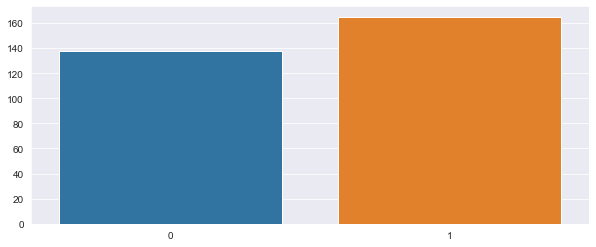

In [4]:
targets = df.target.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=targets.index, y=targets.values)
plt.show()

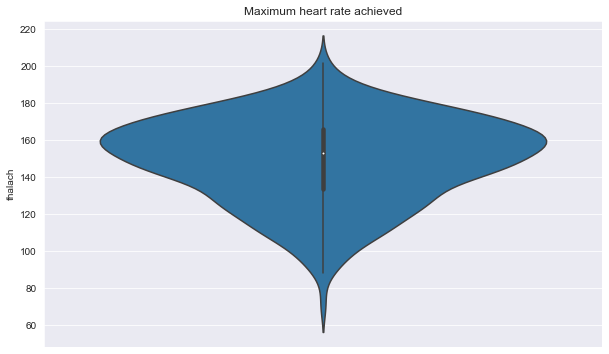

In [5]:
plt.figure(figsize=(10,6))
plt.title("Maximum heart rate achieved")
sns.axes_style("dark")
sns.violinplot(y=df["thalach"])
plt.show()

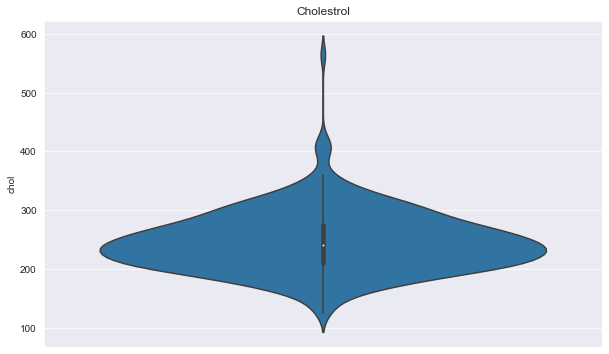

In [6]:
plt.figure(figsize=(10,6))
plt.title("Cholestrol")
sns.axes_style("dark")
sns.violinplot(y=df["chol"])
plt.show()

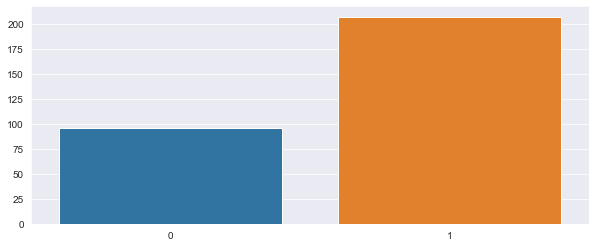

In [7]:
genders = df.sex.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

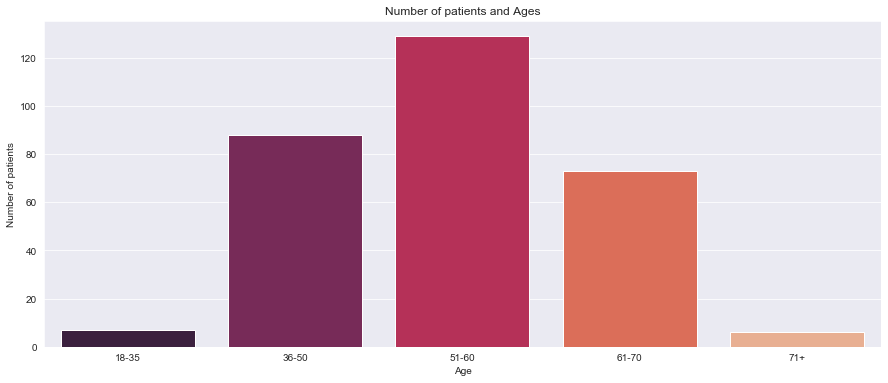

In [8]:
age1 = df.age[(df.age <= 35) & (df.age >= 18)]
age2 = df.age[(df.age <= 50) & (df.age >= 36)]
age3 = df.age[(df.age <= 60) & (df.age >= 51)]
age4 = df.age[(df.age <= 70) & (df.age >= 61)]
age5 = df.age[df.age >= 71]

x = ["18-35","36-50","51-60","61-70","71+"]
y = [len(age1.values),len(age2.values),len(age3.values),len(age4.values),len(age5.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of patients and Ages")
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.show()

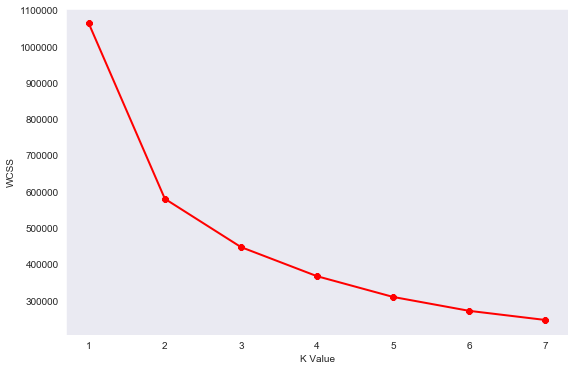

In [9]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(9,6))    
plt.grid()
plt.plot(range(1,8),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,8,1))
plt.ylabel("WCSS")
plt.show()

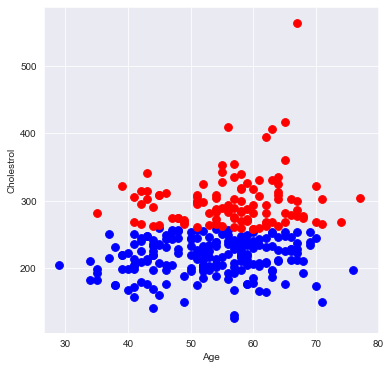

In [10]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df.age[df.label == 0], df["chol"][df.label == 0], c='blue', s=60)
ax.scatter(df.age[df.label == 1], df["chol"][df.label == 1], c='red', s=60)

plt.xlabel("Age")
plt.ylabel("Cholestrol")

plt.show()

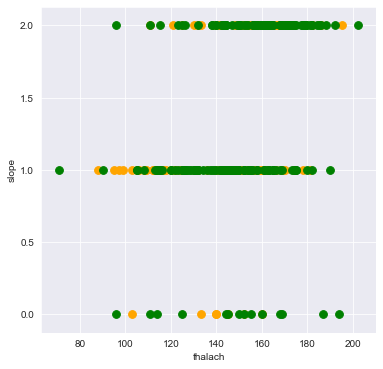

In [11]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df.thalach[df.label == 0], df["slope"][df.label == 0], c='orange', s=60)
ax.scatter(df.thalach[df.label == 1], df["slope"][df.label == 1], c='green', s=60)

plt.xlabel("thalach")
plt.ylabel("slope")

plt.show()